In [188]:
import pandas as pd

##importamos estas bibliotecas para los graficos
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [29]:
#convertimos el archivo a pandas para empezar#
doc_request = pd.read_csv('extract - cash request - data analyst.csv')
doc_fees = pd.read_csv('extract - fees - data analyst.csv')

doc_request.info()
doc_fees.info()

#empezamos con la limpieza de datos 
missing_values_request = pd.isnull(doc_request)
missing_values_fees = pd.isnull(doc_fees)

missing_counts_request = missing_values_request.sum()
missing_counts_fees = missing_values_request.sum()

columns_with_missing_request = missing_counts_request[missing_counts_request > 0].count()
columns_with_missing_fees = missing_counts_fees[missing_counts_fees > 0].count()

all_columns_missing_request = missing_counts_request.all()
all_columns_missing_fees = missing_counts_fees.all()

total_missing_values_request = missing_counts_request.sum()
total_missing_values_fees = missing_counts_fees.sum()

print("Missing Values in Each Column:\n", missing_counts_request)
print("\nNumber of Columns with Missing Values:", columns_with_missing_request)
print("All Columns Have Missing Values:", all_columns_missing_request)
print("\nTotal Missing Values in the DataFrame:", total_missing_values_request)

print("Missing Values in Each Column:\n", missing_counts_fees)
print("\nNumber of Columns with Missing Values:", columns_with_missing_fees)
print("All Columns Have Missing Values:", all_columns_missing_fees)
print("\nTotal Missing Values in the DataFrame:", total_missing_values_fees)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23970 entries, 0 to 23969
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          23970 non-null  int64  
 1   amount                      23970 non-null  float64
 2   status                      23970 non-null  object 
 3   created_at                  23970 non-null  object 
 4   updated_at                  23970 non-null  object 
 5   user_id                     21867 non-null  float64
 6   moderated_at                16035 non-null  object 
 7   deleted_account_id          2104 non-null   float64
 8   reimbursement_date          23970 non-null  object 
 9   cash_request_received_date  16289 non-null  object 
 10  money_back_date             16543 non-null  object 
 11  transfer_type               23970 non-null  object 
 12  send_at                     16641 non-null  object 
 13  recovery_status             333

In [43]:
# Eliminar filas donde faltan datos
doc_request_clean = doc_request.dropna(subset=['created_at', 'status'])
doc_fees_clean = doc_fees.dropna(subset=['created_at', 'status'])
print(doc_request_clean.columns)
print(doc_fees_clean.columns)

Index(['id', 'amount', 'status', 'created_at', 'updated_at', 'user_id',
       'moderated_at', 'deleted_account_id', 'reimbursement_date',
       'cash_request_received_date', 'money_back_date', 'transfer_type',
       'send_at', 'recovery_status', 'reco_creation', 'reco_last_update'],
      dtype='object')
Index(['id', 'cash_request_id', 'type', 'status', 'category', 'total_amount',
       'reason', 'created_at', 'updated_at', 'paid_at', 'from_date', 'to_date',
       'charge_moment'],
      dtype='object')


In [57]:
#Después de limpiar los datos, vamos a Convertir las columnas de fecha al tipo "datetime"
doc_request_clean['created_at'] = pd.to_datetime(doc_request_clean['created_at'], errors='coerce')

doc_fees_clean['created_at'] = pd.to_datetime(doc_fees_clean['created_at'], errors='coerce')

print(doc_request_clean['created_at'].head())

# Verificar si hay valores sin data
missing_dates = doc_request_clean['created_at'].isnull().sum()
print(f'Número de valores nulos en created_at después de la conversión: {missing_dates}')

# Ver DataFrame limpio (primeras filas)
print(doc_request_clean.head())


#se separala fecha ya convertida y la zona honoraria ya que no necesitamos este ultimo dato 
doc_request_clean['date_only'] = doc_request_clean['created_at'].dt.tz_localize(None)

doc_request_clean['timezone'] = doc_request_clean['created_at'].dt.tz

print(doc_request_clean[['created_at', 'date_only', 'timezone']].head())

doc_fees_clean['date_only'] = doc_fees_clean['created_at'].dt.tz_localize(None)
doc_fees_clean['timezone'] = doc_fees_clean['created_at'].dt.tz

print(doc_fees_clean[['created_at', 'date_only', 'timezone']].head())


0   2019-12-10 19:05:21.596873
1   2019-12-10 19:50:12.347780
2   2019-12-10 19:13:35.825460
3   2019-12-10 19:16:10.880172
4   2020-05-06 09:59:38.877376
Name: created_at, dtype: datetime64[ns]
Número de valores nulos en created_at después de la conversión: 0
     id  amount    status                 created_at  \
0     5   100.0  rejected 2019-12-10 19:05:21.596873   
1    70   100.0  rejected 2019-12-10 19:50:12.347780   
2     7   100.0  rejected 2019-12-10 19:13:35.825460   
3    10    99.0  rejected 2019-12-10 19:16:10.880172   
4  1594   100.0  rejected 2020-05-06 09:59:38.877376   

                      updated_at  user_id                   moderated_at  \
0   2019-12-11 16:47:42.40783+00    804.0  2019-12-11 16:47:42.405646+00   
1  2019-12-11 14:24:22.900054+00    231.0  2019-12-11 14:24:22.897988+00   
2  2019-12-11 09:46:59.779773+00    191.0  2019-12-11 09:46:59.777728+00   
3  2019-12-18 14:26:18.136163+00    761.0  2019-12-18 14:26:18.128407+00   
4   2020-05-07 09:21:5

In [69]:
### Asignar/hacer los cohortes ###

# Convertir la columna 'date_only' al período mensual (cohorte)
doc_request_clean['cohort_request_meses'] = doc_request_clean['date_only'].dt.to_period('M')
print(doc_request_clean[['date_only', 'cohort_request_meses']].head())

                   date_only cohort_request_meses
0 2019-12-10 19:05:21.596873              2019-12
1 2019-12-10 19:50:12.347780              2019-12
2 2019-12-10 19:13:35.825460              2019-12
3 2019-12-10 19:16:10.880172              2019-12
4 2020-05-06 09:59:38.877376              2020-05
cohort_request_meses
2019-11       1
2019-12     289
2020-01     223
2020-02     184
2020-03     244
2020-04     473
2020-05     837
2020-06    2615
2020-07    3601
2020-08    3417
2020-09    4221
2020-10    7725
2020-11     140
Freq: M, dtype: int64


### frecuencia de uso ###

Frecuencia de uso del servicio por cohorte:
 cohort
2019-11       1
2019-12     289
2020-01     223
2020-02     184
2020-03     244
2020-04     473
2020-05     837
2020-06    2615
2020-07    3601
2020-08    3417
2020-09    4221
2020-10    7725
2020-11     140
Freq: M, dtype: int64


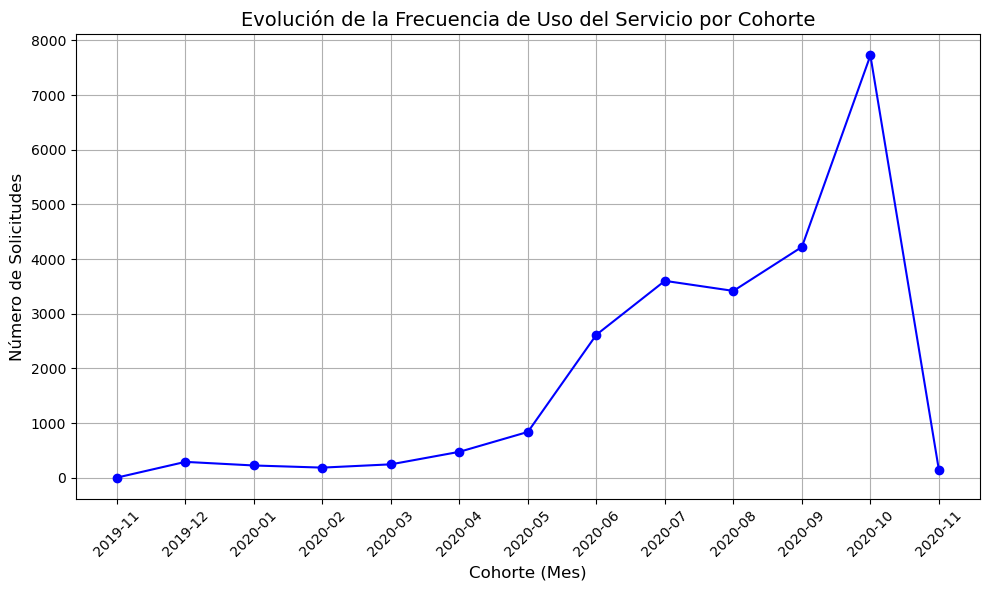

In [196]:

# Agrupar por cohorte y contar la frecuencia de uso del servicio
cohort_usage = doc_request_clean.groupby('cohort').size()

print("Frecuencia de uso del servicio por cohorte:\n", cohort_usage)

cohort_usage = doc_request_clean.groupby('cohort').size()

# Visualizar
plt.figure(figsize=(10, 6))
plt.plot(cohort_usage.index.astype(str), cohort_usage.values, marker='o', linestyle='-', color='b')


plt.title('Evolución de la Frecuencia de Uso del Servicio por Cohorte', fontsize=14)
plt.xlabel('Cohorte (Mes)', fontsize=12)
plt.ylabel('Número de Solicitudes', fontsize=12)

plt.xticks(rotation=45)

plt.grid(True)
plt.tight_layout() 
plt.show()

### Tasa indicidentes ###

         n_incidentes  n_transacciones  tasa_incidentes
cohort                                                 
2019-11           0.0                1         0.000000
2019-12          79.0              230        34.347826
2020-01          83.0              176        47.159091
2020-02          51.0              157        32.484076
2020-03          55.0              207        26.570048
2020-04         120.0              418        28.708134
2020-05         167.0              727        22.971114
2020-06         746.0             2251        33.140826
2020-07        1273.0             3159        40.297563
2020-08        1148.0             3090        37.152104
2020-09        1116.0             3802        29.352972
2020-10         428.0             7512         5.697551
2020-11           3.0              137         2.189781


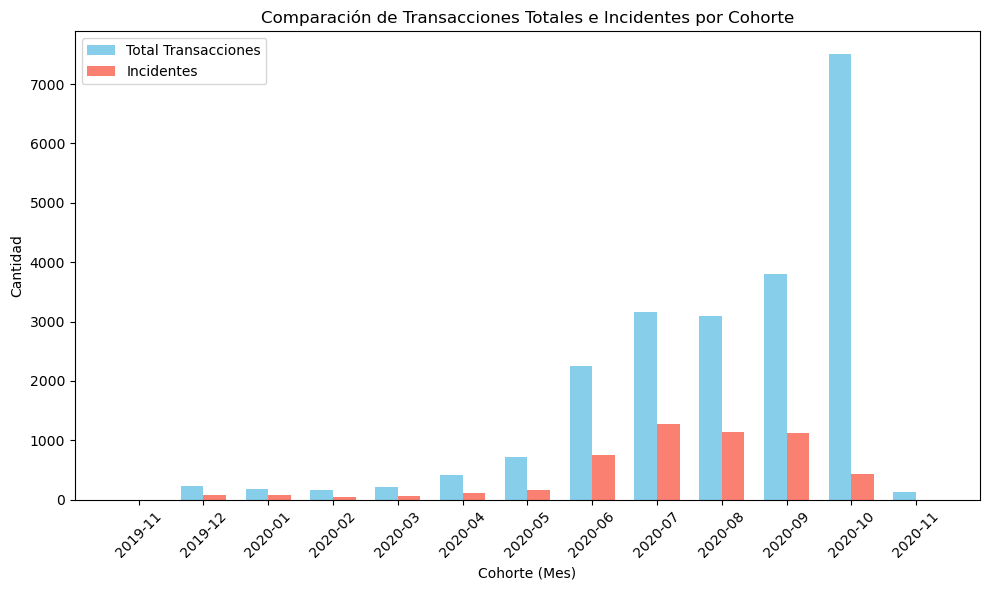

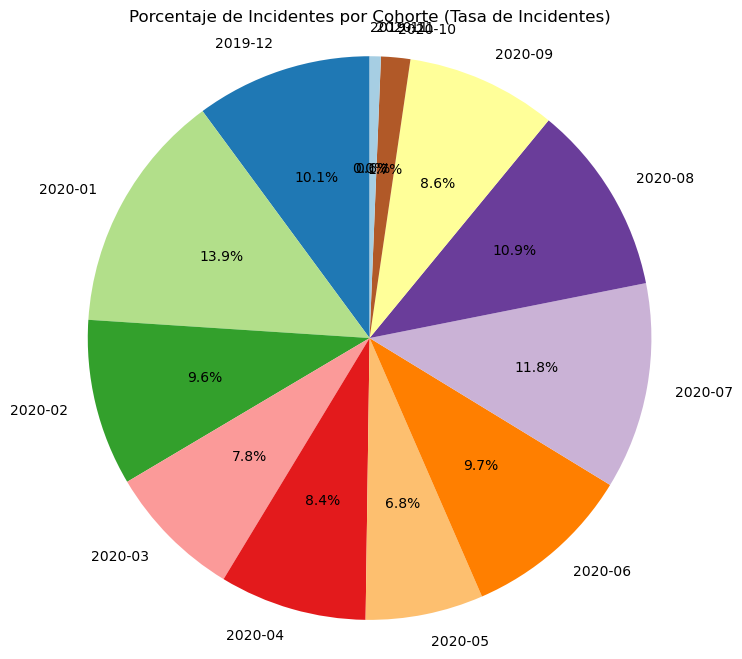

In [198]:

#Filtrar las filas con incidentes (rejected y transaction_declined)
incidents = doc_request_clean[doc_request_clean['status'].isin(['rejected', 'transaction_declined'])]


incidents_count = incidents.groupby(by='cohort').agg({'user_id': 'count'}).rename(columns={'user_id':'n_incidentes'})


cohortes_count = doc_request_clean.groupby(by='cohort').agg({'user_id': 'count'}).rename(columns={'user_id': 'n_transacciones'})


cohortes_incidentes = cohortes_count.join(incidents_count).fillna(0)


cohortes_incidentes['tasa_incidentes'] = (cohortes_incidentes['n_incidentes'] / cohortes_incidentes['n_transacciones']) * 100


print(cohortes_incidentes[['n_incidentes', 'n_transacciones', 'tasa_incidentes']])


#visualizar
bar_width = 0.35
index = np.arange(len(cohortes_incidentes))

fig, ax = plt.subplots(figsize=(10, 6))

bar1 = ax.bar(index, cohortes_incidentes['n_transacciones'], bar_width, label='Total Transacciones', color='skyblue')
bar2 = ax.bar(index + bar_width, cohortes_incidentes['n_incidentes'], bar_width, label='Incidentes', color='salmon')

ax.set_xlabel('Cohorte (Mes)')
ax.set_ylabel('Cantidad')
ax.set_title('Comparación de Transacciones Totales e Incidentes por Cohorte')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(cohortes_incidentes.index.astype(str), rotation=45)
ax.legend()

plt.tight_layout()
plt.show()






# Crear el gráfico de torta
tasa_incidentes = cohortes_incidentes['tasa_incidentes']

plt.figure(figsize=(8, 8))
plt.pie(tasa_incidentes, labels=cohortes_incidentes.index.astype(str), autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)


plt.title('Porcentaje de Incidentes por Cohorte (Tasa de Incidentes)')

plt.axis('equal')
plt.show()

### Total ingresos ###

In [161]:

## hacemos limpieza de datos ya que anteriormente solo habiamos limpiado el doc de request 

doc_fees_clean['created_at'] = pd.to_datetime(doc_fees_clean['created_at'], errors='coerce')

doc_fees_clean['date_only'] = doc_fees_clean['created_at'].dt.tz_localize(None)

doc_fees_clean['timezone'] = doc_fees_clean['created_at'].dt.tz

doc_fees_clean['cohort_fees_meses'] = doc_fees_clean['date_only'].dt.to_period('M')

print(doc_fees_clean[['created_at', 'date_only', 'timezone', 'cohort_fees_meses']])



                      created_at                  date_only timezone  \
0     2020-09-07 10:47:27.423150 2020-09-07 10:47:27.423150     None   
1     2020-09-09 20:51:17.998653 2020-09-09 20:51:17.998653     None   
2     2020-10-23 10:10:58.352972 2020-10-23 10:10:58.352972     None   
3     2020-10-31 15:46:53.643958 2020-10-31 15:46:53.643958     None   
4     2020-10-06 08:20:17.170432 2020-10-06 08:20:17.170432     None   
...                          ...                        ...      ...   
21056 2020-10-10 06:42:22.822743 2020-10-10 06:42:22.822743     None   
21057 2020-10-31 15:24:18.680694 2020-10-31 15:24:18.680694     None   
21058 2020-10-27 17:28:51.749177 2020-10-27 17:28:51.749177     None   
21059 2020-10-23 16:27:52.047457 2020-10-23 16:27:52.047457     None   
21060 2020-10-14 07:12:43.958192 2020-10-14 07:12:43.958192     None   

      cohort_fees_meses  
0               2020-09  
1               2020-09  
2               2020-10  
3               2020-10  
4    

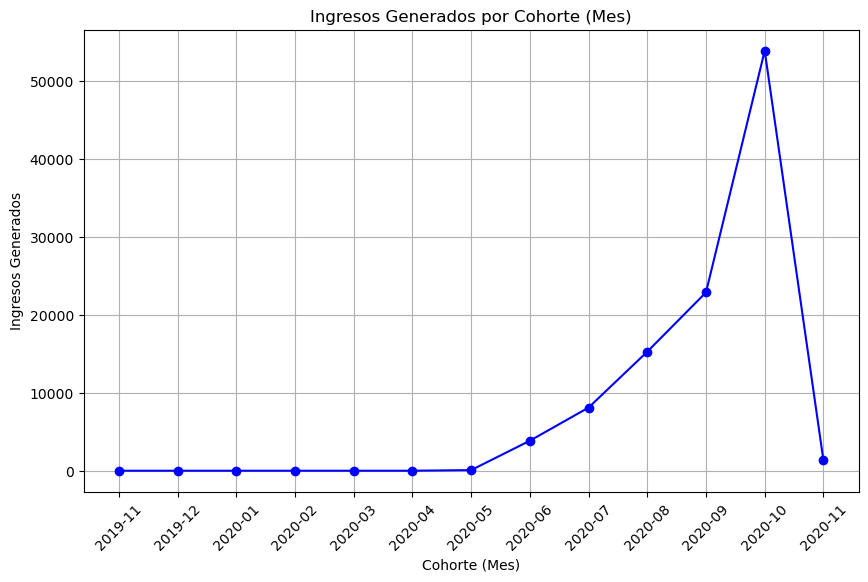

In [173]:
# Agrupamos la columna mes_cohorte y aplicamos la función 'agg' para agregar diferentes metricas
ingresos_sum = doc_fees_clean.groupby(by='cohort_fees_meses').agg({'total_amount': 'sum'}).rename(columns={'total_amount': 'ingresos'})

df_ingresos = cohortes_incidentes.join(ingresos_sum).fillna(1)
df_ingresos


##visuaizar:
plt.figure(figsize=(10, 6))
plt.plot(df_ingresos.index.astype(str), df_ingresos['ingresos'], marker='o', linestyle='-', color='b')

plt.title('Ingresos Generados por Cohorte (Mes)')
plt.xlabel('Cohorte (Mes)')
plt.ylabel('Ingresos Generados')
plt.xticks(rotation=45)  #
plt.grid(True)

# Mostrar el gráfico
plt.show()


Tasa de retención por cohorte:
 months_elapsed   0.0     1.0    2.0    3.0    4.0     5.0     6.0    7.0   \
cohort                                                                      
2019-11         100.0  100.00   0.00   0.00   0.00  100.00  100.00   0.00   
2019-12         100.0   33.82  21.57  27.45  25.98   32.35   28.92  25.49   
2020-01         100.0   21.11  15.56  30.00  25.56   26.67   30.00  23.33   
2020-02         100.0   52.38  48.81  48.81  45.24   42.86   42.86  29.76   
2020-03         100.0   50.72  46.38  59.42  43.48   40.58   37.68  39.13   
2020-04         100.0   49.06  50.94  39.62  35.85   31.13   27.83   0.00   
2020-05         100.0   61.52  53.66  45.26  34.69   40.11    0.81   0.00   
2020-06         100.0   52.09  51.57  40.36  40.51    0.30    0.00   0.00   
2020-07         100.0   49.92  37.40  39.49   0.54    0.00    0.00   0.00   
2020-08         100.0   42.53  37.20   1.52   0.00    0.00    0.00   0.00   
2020-09         100.0   38.55   1.17   0.00

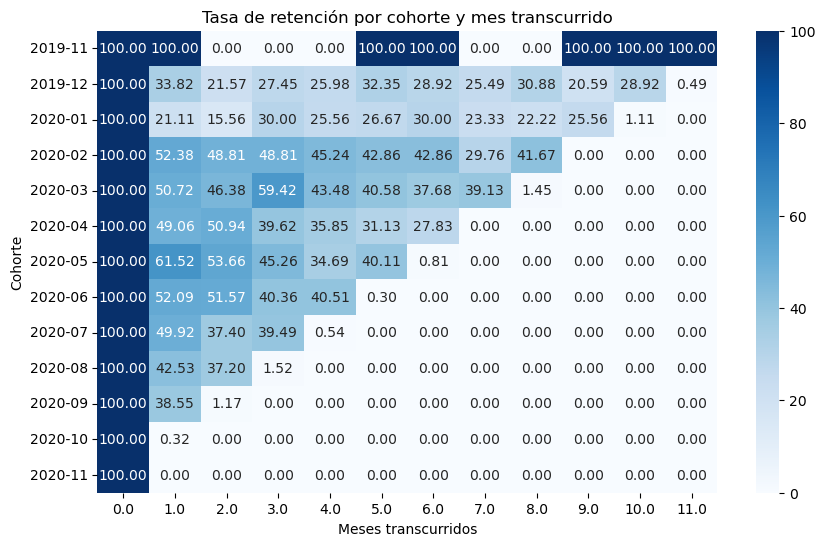

In [212]:

doc_request_clean['created_at'] = pd.to_datetime(doc_request_clean['created_at'], errors='coerce')

doc_request_clean['cohort'] = doc_request_clean.groupby('user_id')['created_at'].transform('min').dt.to_period('M')


doc_request_clean['months_elapsed'] = (doc_request_clean['created_at'].dt.to_period('M') - doc_request_clean['cohort'])


doc_request_clean['months_elapsed'] = doc_request_clean['months_elapsed'].apply(lambda x: x.n if pd.notnull(x) else np.nan)

usuarios_iniciales = doc_request_clean.groupby('cohort')['user_id'].nunique()

usuarios_activos = doc_request_clean.groupby(['cohort', 'months_elapsed'])['user_id'].nunique()


retencion = usuarios_activos.unstack().divide(usuarios_iniciales, axis=0)

retencion = retencion.fillna(0) * 100 
print("\nTasa de retención por cohorte:\n", retencion.round(2))

# Visualización 
plt.figure(figsize=(10, 6))
sns.heatmap(retencion, annot=True, fmt=".2f", cmap="Blues")
plt.title("Tasa de retención por cohorte y mes transcurrido")
plt.xlabel("Meses transcurridos")
plt.ylabel("Cohorte")
plt.show()

